###  To install polsartools type ``pip install polsartools``
If the above fails because of gdal package, 
try to install gdal using `conda install gdal -c conda-forge` then install `polsartools`

In [78]:
""" import required packages"""

import polsartools as pst
import os
import matplotlib.pyplot as plt
import numpy as np

def read_rst(file):
    """ 
    Function to read a geotiff to a numpy array
    
    """
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr
    

#### 1. Extract multilooked C2 matrix from NISAR RSLC data


In [79]:
inFile =r"NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20221010T060152_20221010T060202_T00888_M_F_J_888.h5"
inFile =r"NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888.h5"

# The follwoing function extracts multilooked C2 matrix from NISAR RSLC data. 
# Provide path to the NISAR RSLC .h5 file.

pst.nisar_rslc(inFile,azlks=20,rglks=10) # 5m,10m SLC spacing

Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888\C2/C11.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888\C2/C22.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888\C2/C12_real.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888\C2/C12_imag.bin
Execution time for nisar_rslc: 38.01 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [80]:
c2Folder = os.path.join(inFile.split('.h5')[0],'C2')
window_size = 3
pst.rlee(c2Folder,window_size=window_size)

Progress : 100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.34s/ block]


Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\C11.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\C12_real.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\C12_imag.bin
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\C22.bin
Execution time for rlee: 8.85 seconds


#### 3. Generate a quick look RGB from C2 matrix (optional)

RGB image saved as NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\RGB4.png
Execution time for dxpRGB: 0.55 seconds


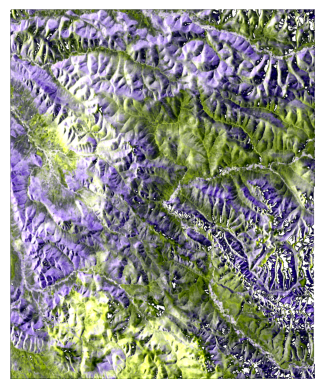

In [81]:

c2Folder = os.path.join(inFile.split('.h5')[0]+f'_rlee_{window_size}x{window_size}','C2')
# pst.utils.dxpRGB(c2Folder,type=1)
# pst.utils.dxpRGB(c2Folder,type=2)
# pst.utils.dxpRGB(c2Folder,type=3)
pst.utils.dxpRGB(c2Folder,type=4)

#### 4. Generating some polarimetric parameters from C2 matrix

##### 4.1 Barakat Degree of polarization 

In [82]:

pst.dopdp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.79 block/s]


Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\dopdp.tif
Execution time for dopdp: 2.78 seconds


##### Preview the output

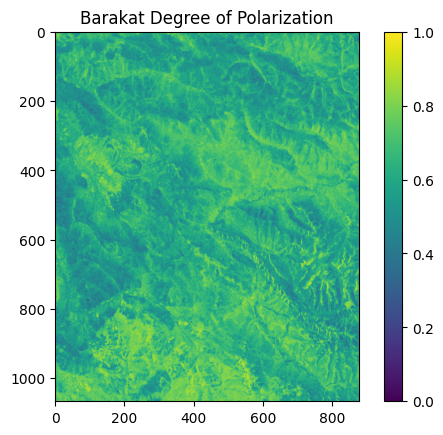

In [83]:


data = pst.utils.read_bin(c2Folder+'/dopdp.tif')
fig,ax = plt.subplots()
plt.imshow(data,vmin=0,vmax=1)
ax.set_title('Barakat Degree of Polarization')
plt.colorbar()



##### 4.2. Entropy-Alpha (H/α) parameters 

In [84]:
pst.halphadp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.71 block/s]


Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\Hdp.tif
Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\alphadp.tif
Execution time for halphadp: 4.11 seconds


##### Preview the output

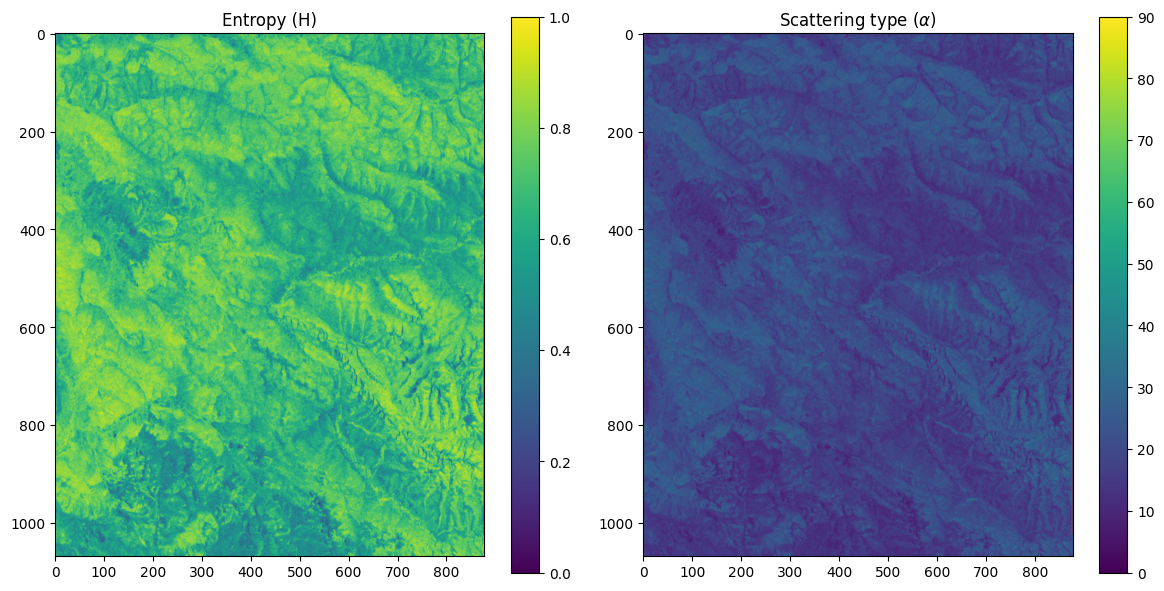

In [85]:

data1 = pst.utils.read_bin(c2Folder + '/Hdp.tif')
data2 = pst.utils.read_bin(c2Folder + '/alphadp.tif')
# fig, ax = plt.subplots(ncols=2)
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

ax[0].imshow(data1, vmin=0, vmax=1)
ax[0].set_title("Entropy (H)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=1), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=90)
ax[1].set_title(r"Scattering type ($\alpha$)")
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=90), ax=ax[1])

plt.tight_layout()

##### 4.3. vegetation indices, Radar vegetation index (RVI), Dual-pol Radar Vegetation Index (DpRVI)

In [86]:

pst.rvidp(c2Folder)

pst.dprvi(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.52 block/s]


Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\rvidp.tif
Execution time for rvidp: 3.03 seconds


Progress : 100%|███████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.23 block/s]


Saved file NISAR_L1_PR_RSLC_001_001_A_000_2000_SHNA_A_20210723T091154_20210723T091204_T00888_M_F_J_888_rlee_3x3\C2\dprvi.tif
Execution time for dprvi: 3.33 seconds


##### Preview the output

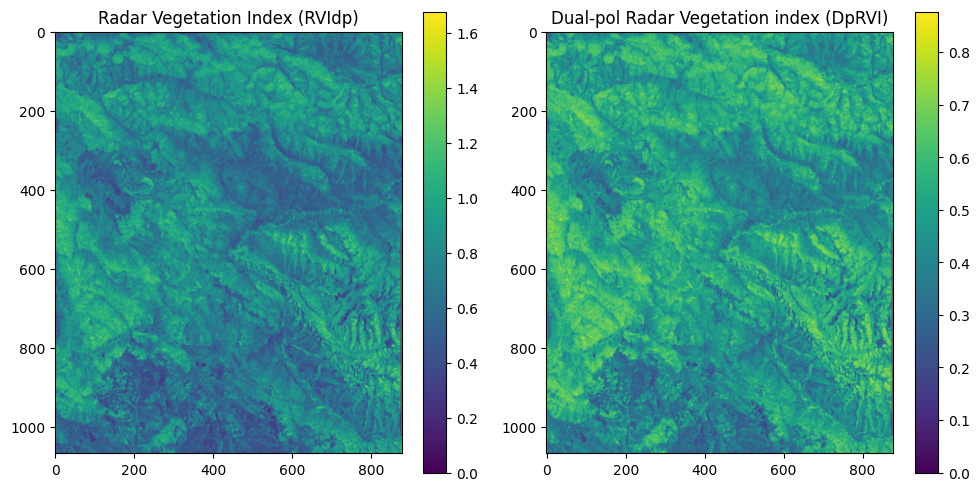

In [87]:

data1 = pst.utils.read_bin(c2Folder + '/rvidp.tif')
data2 = pst.utils.read_bin(c2Folder + '/dprvi.tif')

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1))
ax[0].set_title("Radar Vegetation Index (RVIdp)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1)), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2))
ax[1].set_title(r'Dual-pol Radar Vegetation index (DpRVI)')
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2)), ax=ax[1])

plt.tight_layout()